In [1]:
import os
import sys
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

from models.linear_regression import linear_regression, predict
from models.polynomial_regression import polynomial_regression, predict_polynomial

from utils.errors import mae, mse, rmse
from utils.reporting import (
    format_equation,
    print_prediction,
    format_polynomial_equation,
    print_prediction_poly
)

from utils.plot_points import plot_points
from utils.plot_model_poly import plot_model_poly
from utils.plot_errors import plot_errors

warnings.filterwarnings('ignore')

# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö –∏ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –∏—Ö –≥—Ä–∞—Ñ–∏–∫–∞

In [2]:
# 1. –î–∞–Ω–Ω—ã–µ
features = np.array([1, 2, 3, 5, 6, 7])
labels = np.array([155, 197, 244, 356, 407, 448])

figsize = (12, 4)
xlim=(0, 8)
ylim=(100, 500)

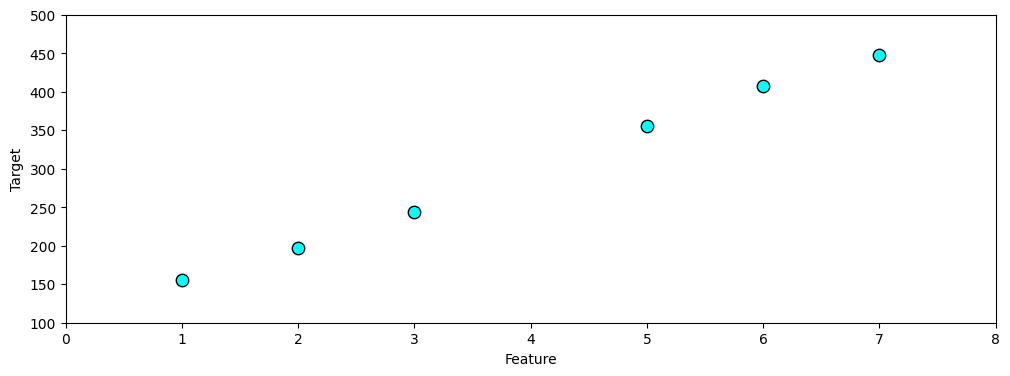

In [3]:
plt.figure(figsize=figsize)
plot_points(features, labels, markers=("o"), xlim=xlim, ylim=ylim)
plt.show()

In [4]:
# 2. –û–±—É—á–µ–Ω–∏–µ
trick = 'square'
error = 'rmse'

m, b, errors_list = linear_regression(features, labels, epochs=10000, trick=trick, error=error)

In [5]:
# 3. –û—Ç—á—ë—Ç–Ω–æ—Å—Ç—å
print("–£—Ä–∞–≤–Ω–µ–Ω–∏–µ –ø—Ä—è–º–æ–π:", format_equation(m, b))
print(print_prediction(m, b, 4))  # –¥–ª—è –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–≥–æ X = 4

–£—Ä–∞–≤–Ω–µ–Ω–∏–µ –ø—Ä—è–º–æ–π: y = 50.76 * x + 99.58
–î–ª—è 4 –∫–æ–º–Ω–∞—Ç ‚Üí –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–∞—è —Ü–µ–Ω–∞: 302.63


In [6]:
# 4. –ü—Ä–æ–≥–Ω–æ–∑—ã + –º–µ—Ç—Ä–∏–∫–∞
predictions = np.array([predict(m, b, r) for r in features])

print(f"MAE: \t {mae(labels, predictions):.2f}")
print(f"MSE: \t {mse(labels, predictions):.2f}")
print(f"RMSE: \t {rmse(labels, predictions):.2f}")

MAE: 	 4.83
MSE: 	 27.20
RMSE: 	 5.22


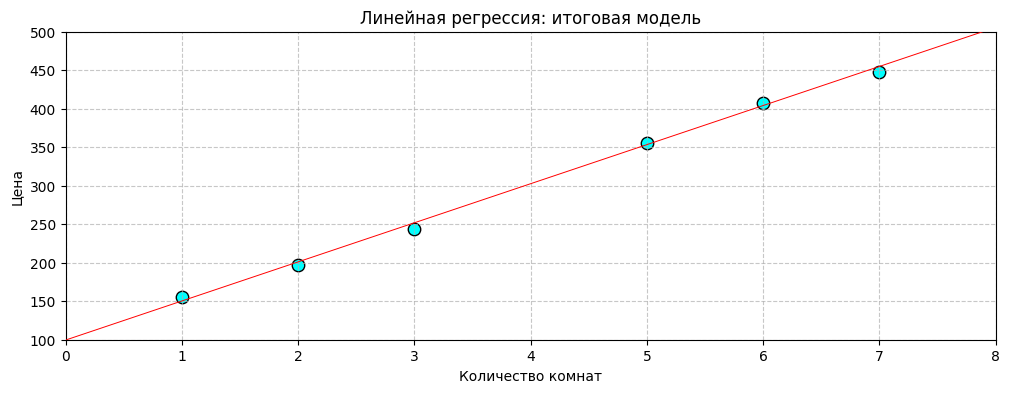

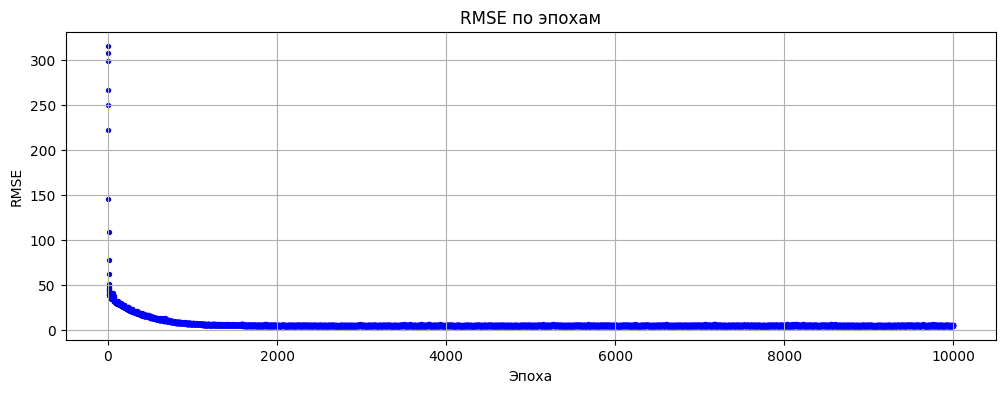

In [7]:
x = np.linspace(0, 8, num=1000)  # 1000 —Ç–æ—á–µ–∫ –º–µ–∂–¥—É start –∏ end
y = m * x + b  # –í—ã—á–∏—Å–ª—è–µ–º y –ø–æ —Ñ–æ—Ä–º—É–ª–µ

# 5. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=figsize)
plot_points(features, labels, markers='o', xlim=xlim, ylim=ylim)
plt.plot(x, y, linestyle='-', color='red', linewidth=0.7, zorder=5)
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–æ–º–Ω–∞—Ç')
plt.ylabel('–¶–µ–Ω–∞')
plt.grid(True, linestyle='--', alpha=0.7)
plt.title("–õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è: –∏—Ç–æ–≥–æ–≤–∞—è –º–æ–¥–µ–ª—å")
plt.show()

plt.figure(figsize=figsize)
plot_errors(errors_list, error, style='scatter')
plt.show()

# üîÅ –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –≤—Å–µ—Ö –∫–æ–º–±–∏–Ω–∞—Ü–∏–π
*–ü–æ–∏—Å–∫ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ —Å–æ—á–µ—Ç–∞–Ω–∏—è –º–µ—Ç–æ–¥–∞ –æ–±–Ω–æ–≤–ª–µ–Ω–∏—è –≤–µ—Å–æ–≤ (trick), —Ä–µ–∂–∏–º–∞ –æ–±—É—á–µ–Ω–∏—è (mode) –∏ –º–µ—Ç—Ä–∏–∫–∏ –æ—à–∏–±–∫–∏ (error).*

In [8]:
# 1. –î–∞–Ω–Ω—ã–µ
features = np.array([1, 2, 3, 5, 6, 7])
labels = np.array([155, 197, 244, 356, 407, 448])

# 2. –ì–ª–æ–±–∞–ª—å–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
tricks = ['simple', 'absolute', 'square']
modes = ['sgd', 'batch', 'mini']
errors = ['mae', 'mse', 'rmse']

epochs = 3000
learning_rate = 0.01

In [9]:
# 3. –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –≤—Å–µ—Ö –∫–æ–º–±–∏–Ω–∞—Ü–∏–π

results = {}

for trick in tricks:
    results[trick] = {}
    for error in errors:
        results[trick][error] = {}
        for mode in modes:
            m, b, errors_list = linear_regression(
                features,
                labels,
                learning_rate=learning_rate,
                epochs=epochs,
                trick=trick,
                error=error,
                mode=mode,
                batch_size=2
            )
            predictions = np.array([predict(m, b, r) for r in features])
            results[trick][error][mode] = {
                'm': m,
                'b': b,
                'errors_list': errors_list,
                'mae': mae(labels, predictions),
                'mse': mse(labels, predictions),
                'rmse': rmse(labels, predictions)
            }

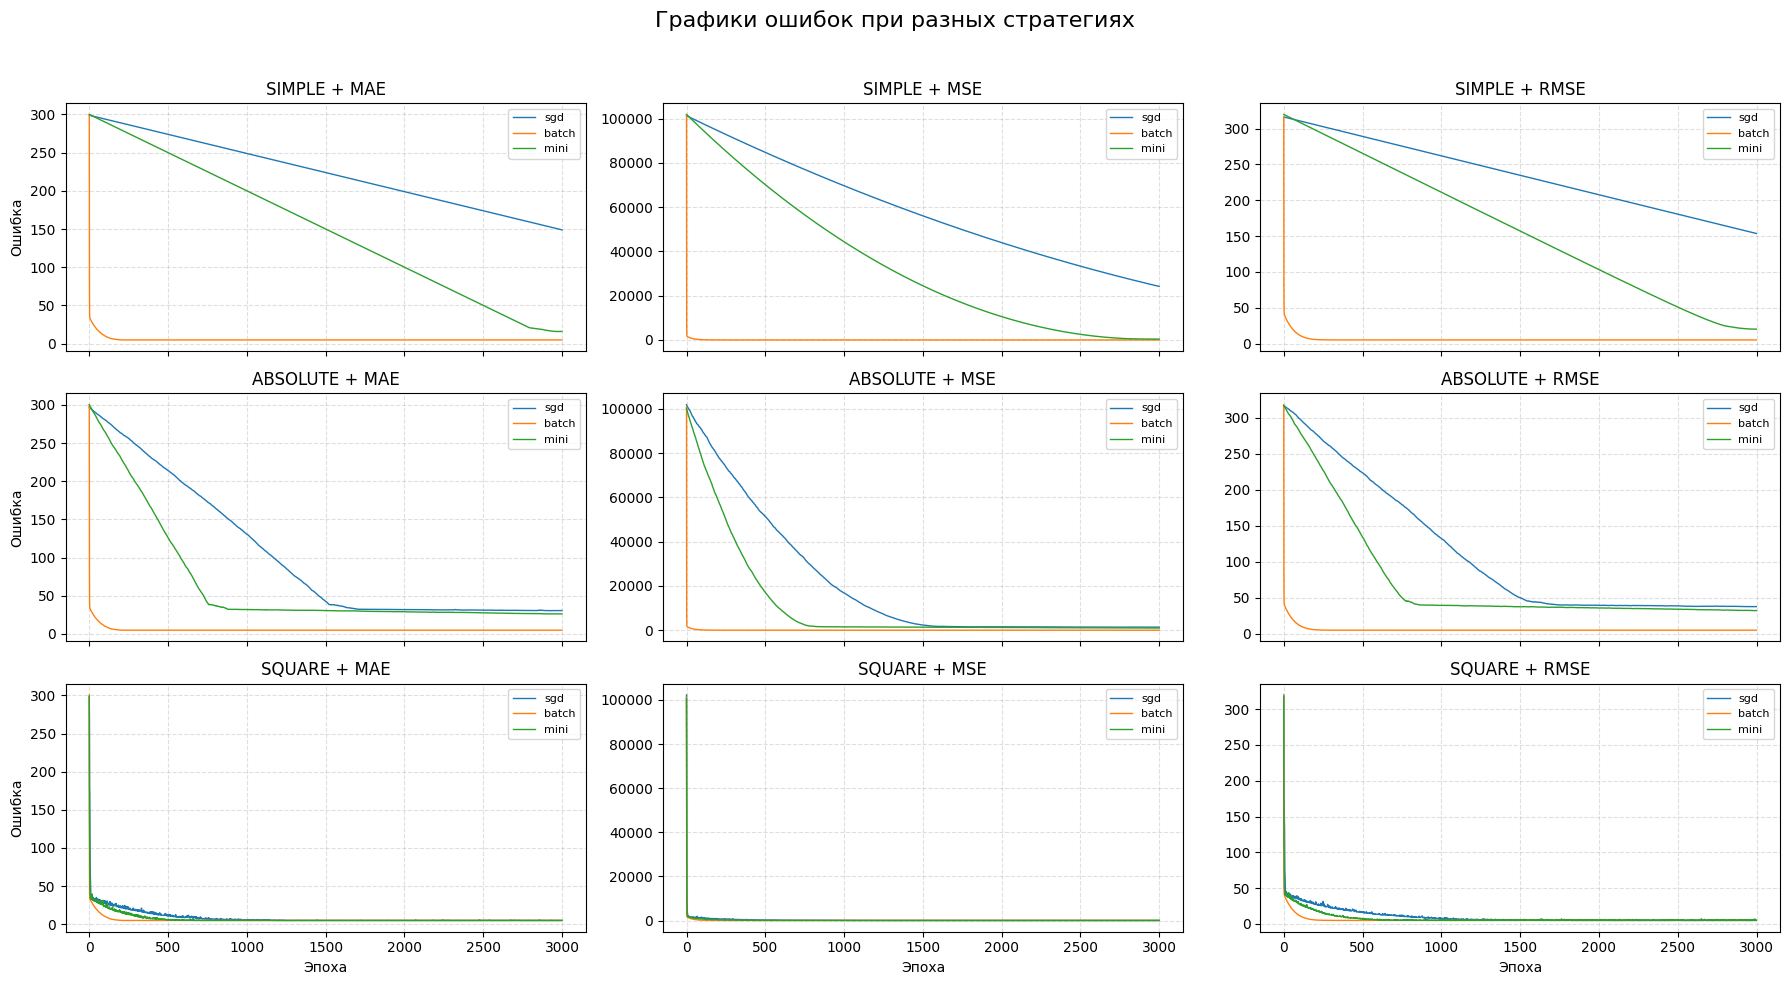

In [10]:
# 4. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –æ—à–∏–±–æ–∫ (Error Curves)
fig, axs = plt.subplots(len(tricks), len(errors), figsize=(18, 10), sharex=True)#, sharey=True)
fig.suptitle("–ì—Ä–∞—Ñ–∏–∫–∏ –æ—à–∏–±–æ–∫ –ø—Ä–∏ —Ä–∞–∑–Ω—ã—Ö —Å—Ç—Ä–∞—Ç–µ–≥–∏—è—Ö", fontsize=16)

for i, trick in enumerate(tricks):
    for j, error in enumerate(errors):
        ax = axs[i, j]
        for mode in modes:
            ax.plot(results[trick][error][mode]['errors_list'], label=mode, linewidth=1)
        ax.set_title(f"{trick.upper()} + {error.upper()}")
        ax.grid(True, linestyle='--', alpha=0.4)
        if j == 0:
            ax.set_ylabel("–û—à–∏–±–∫–∞")
        if i == len(tricks) - 1:
            ax.set_xlabel("–≠–ø–æ—Ö–∞")
        ax.legend(fontsize=8)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

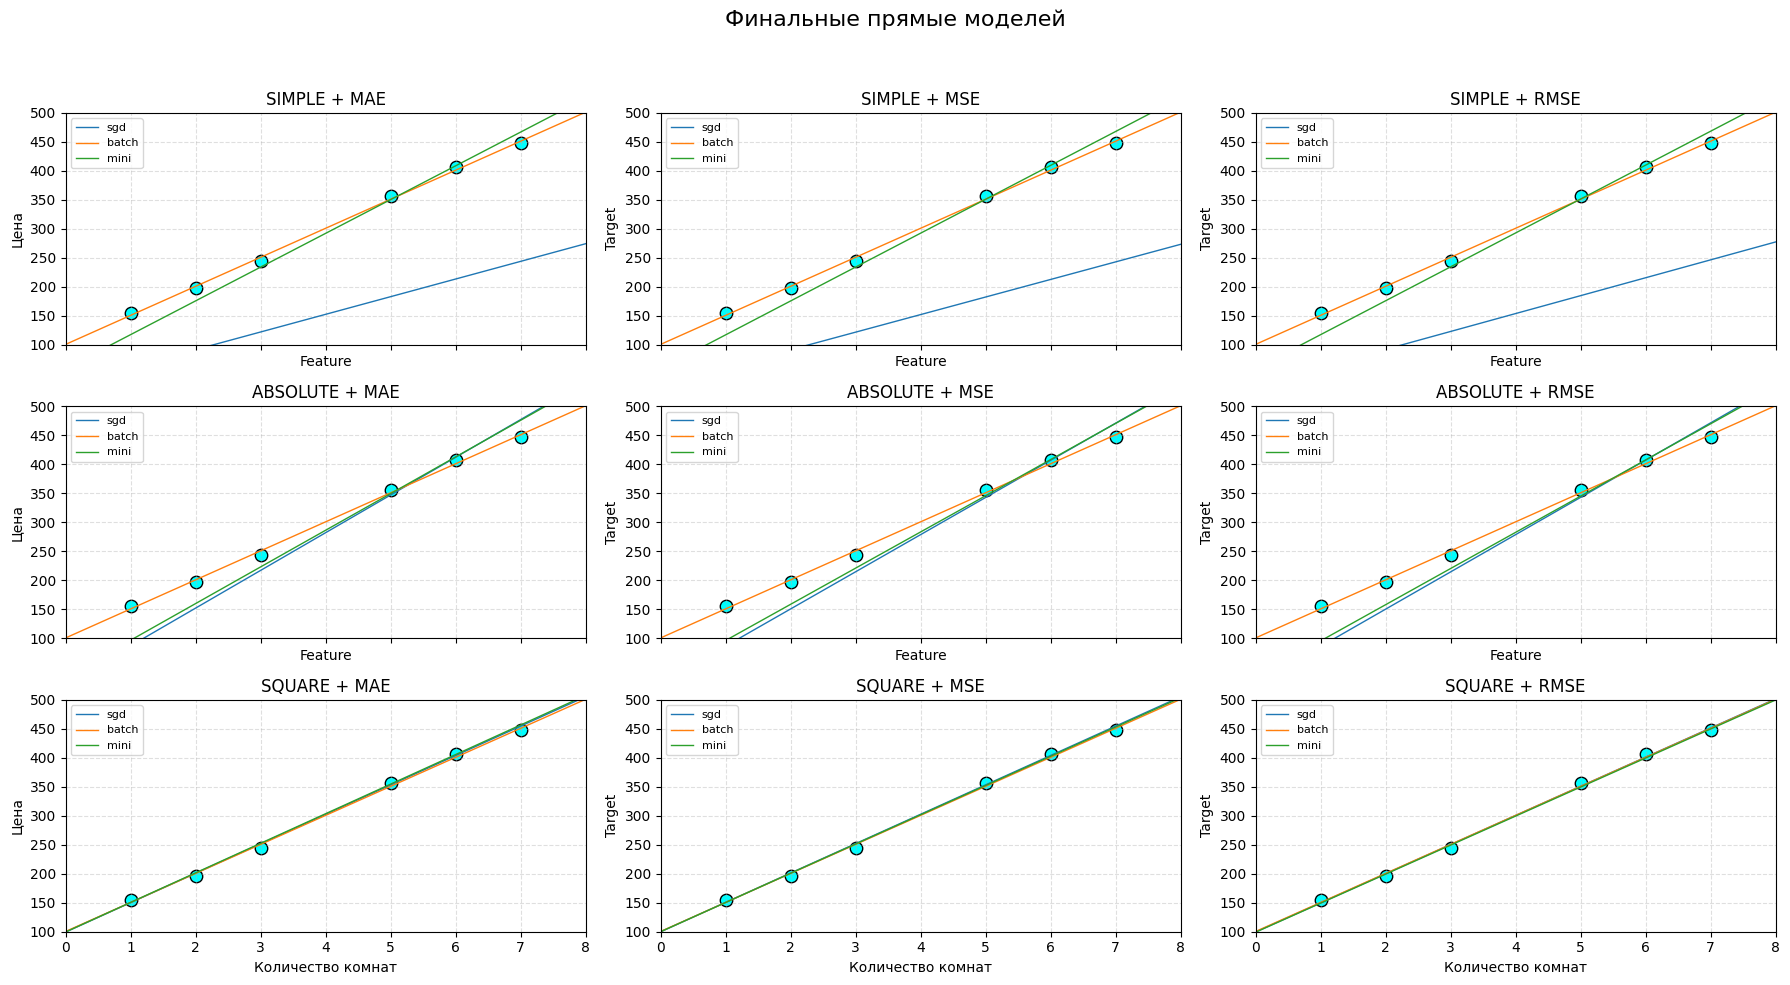

In [11]:
# 5. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –º–æ–¥–µ–ª–µ–π (Regression Lines)
fig, axs = plt.subplots(len(tricks), len(errors), figsize=(18, 10), sharex=True)
fig.suptitle("–§–∏–Ω–∞–ª—å–Ω—ã–µ –ø—Ä—è–º—ã–µ –º–æ–¥–µ–ª–µ–π", fontsize=16)

x_range = np.linspace(0, 8, 100)

for i, trick in enumerate(tricks):
    for j, error in enumerate(errors):
        ax = axs[i, j] if len(tricks) > 1 else axs[j]
        
        # 1. –û—Ç–æ–±—Ä–∞–∑–∏–º –∏—Å—Ö–æ–¥–Ω—ã–µ —Ç–æ—á–∫–∏
        plot_points(features, labels, markers='o', xlim=xlim, ylim=ylim, ax=ax)
        
        # 2. –û—Ç–æ–±—Ä–∞–∑–∏–º –ø—Ä—è–º—ã–µ –≤—Å–µ—Ö —Ä–µ–∂–∏–º–æ–≤
        for mode in modes:
            m = results[trick][error][mode]['m']
            b = results[trick][error][mode]['b']
            y_range = m * x_range + b
            ax.plot(x_range, y_range, label=mode, linewidth=1)

        # 3. –û—Ñ–æ—Ä–º–ª–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
        ax.set_title(f"{trick.upper()} + {error.upper()}")
        ax.grid(True, linestyle='--', alpha=0.4)
        ax.legend(fontsize=8)
        
        if j == 0:
            ax.set_ylabel("–¶–µ–Ω–∞")
        if i == len(tricks) - 1:
            ax.set_xlabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–æ–º–Ω–∞—Ç")
        
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [12]:
# 6. –°—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω–∞—è —Ç–∞–±–ª–∏—Ü–∞ –æ—à–∏–±–æ–∫
table = []

for trick in tricks:
    for error in errors:
        for mode in modes:
            row = {
                "Trick": trick,
                "Error Metric": error,
                "Mode": mode,
                "MAE": round(results[trick][error][mode]["mae"], 2),
                "MSE": round(results[trick][error][mode]["mse"], 2),
                "RMSE": round(results[trick][error][mode]["rmse"], 2),
            }
            table.append(row)

df_results = pd.DataFrame(table)
df_results.sort_values(by=["RMSE"]).reset_index(drop=True)

Trick Error Metric   Mode     MAE       MSE    RMSE
0     square         rmse    sgd    4.83     24.69    4.97
1     square          mse   mini    4.83     24.92    4.99
2     simple          mae  batch    4.83     25.03    5.00
3     simple          mse  batch    4.83     25.03    5.00
4   absolute          mse  batch    4.83     25.03    5.00
5     square          mse  batch    4.83     25.03    5.00
6     simple         rmse  batch    4.83     25.03    5.00
7   absolute          mae  batch    4.83     25.03    5.00
8   absolute         rmse  batch    4.83     25.03    5.00
9     square         rmse  batch    4.83     25.03    5.00
10    square          mae  batch    4.83     25.03    5.00
11    square          mae    sgd    4.83     26.79    5.18
12    square          mse    sgd    4.83     27.18    5.21
13    square         rmse   mini    4.83     27.50    5.24
14    square          mae   mini    4.83     32.41    5.69
15    simple          mae   mini   15.91    396.12   19.90
16    simple         rmse   mini   16.09    402.36   20.06
17    simple          mse   mini   16.19    407.69   20.19
18  absolute          mae   mini   26.15   1017.64   31.90
19  absolute          mse   mini   25.77   1018.75   31.92
20  absolute         rmse   mini   25.99   1043.12   32.30
21  absolute          mae    sgd   30.57   1393.46   37.33
22  absolute          mse    sgd   30.16   1407.46   37.52
23  absolute         rmse    sgd   30.43   1432.08   37.84
24    simple         rmse    sgd  147.55  23571.70  153.53
25    simple          mae    sgd  148.88  24045.09  155.06
26    simple          mse    sgd  149.33  24205.64  155.58

In [13]:
# df_results.to_excel('results.xlsx')

# üìä –û–±—â–∏–π —Ñ–∏–Ω–∞–ª—å–Ω—ã–π –≤—ã–≤–æ–¥:  
**–õ—É—á—à–µ–µ —Å–æ—á–µ—Ç–∞–Ω–∏–µ:**
 - ‚úÖ **Trick:** square  
 - ‚úÖ **Mode:** batch (–∏–ª–∏ mini-batch)  
 - ‚úÖ **Error metric:** –Ω–µ–≤–∞–∂–Ω–æ (mae / mse / rmse —Å—Ö–æ–∂–∏ –ø—Ä–∏ —Ö–æ—Ä–æ—à–µ–º –æ–±—É—á–µ–Ω–∏–∏)  

**–û–±—â–∞—è —Ç–µ–Ω–¥–µ–Ω—Ü–∏—è:**
 - square $> ($ absolute $‚âà$ simple $)$
 - batch $>$ mini-batch $>$ sgd

# –õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ Scikit-Learn

In [14]:
# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –º–∞—Å—Å–∏–≤ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (features) –≤ –¥–≤—É–º–µ—Ä–Ω—ã–π —Ñ–æ—Ä–º–∞—Ç.
# Scikit-Learn —Ç—Ä–µ–±—É–µ—Ç, —á—Ç–æ–±—ã –≤—Ö–æ–¥–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –±—ã–ª–∏ –≤ –≤–∏–¥–µ –º–∞—Ç—Ä–∏—Ü—ã (n –æ–±—Ä–∞–∑—Ü–æ–≤ √ó m –ø—Ä–∏–∑–Ω–∞–∫–æ–≤),
# –¥–∞–∂–µ –µ—Å–ª–∏ —É –Ω–∞—Å –≤—Å–µ–≥–æ –æ–¥–∏–Ω –ø—Ä–∏–∑–Ω–∞–∫.
features_reshaped = features.reshape(-1, 1)

In [15]:
# –°–æ–∑–¥–∞—ë–º –æ–±—ä–µ–∫—Ç –º–æ–¥–µ–ª–∏ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
model = LinearRegression()

# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å –Ω–∞ –Ω–∞—à–∏—Ö –¥–∞–Ω–Ω—ã—Ö (–ø—Ä–∏–∑–Ω–∞–∫–∏ + –ø—Ä–∞–≤–∏–ª—å–Ω—ã–µ –æ—Ç–≤–µ—Ç—ã)
# –ú–æ–¥–µ–ª—å –ø–æ–¥–±–µ—Ä—ë—Ç —Ç–∞–∫–∏–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã, —á—Ç–æ–±—ã –º–∏–Ω–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å —Å—É–º–º—É –∫–≤–∞–¥—Ä–∞—Ç–∏—á–µ—Å–∫–∏—Ö –æ—à–∏–±–æ–∫ (RSS, –∞ –Ω–µ MSE)
model.fit(features_reshaped, labels)

LinearRegression()

## –ü–æ—á–µ–º—É –≤ LinearRegression –º–∏–Ω–∏–º–∏–∑–∏—Ä—É–µ—Ç—Å—è RSS, –∞ –Ω–µ MSE?
 - –ú–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏ –º–∏–Ω–∏–º–∏–∑–∞—Ü–∏—è RSS —ç–∫–≤–∏–≤–∞–ª–µ–Ω—Ç–Ω–∞ –º–∏–Ω–∏–º–∏–∑–∞—Ü–∏–∏ MSE (—Ç–∞–∫ –∫–∞–∫ MSE = RSS/n, –≥–¥–µ n - –∫–æ–Ω—Å—Ç–∞–Ω—Ç–∞)
 - Scikit-learn –∏—Å–ø–æ–ª—å–∑—É–µ—Ç —á–∏—Å–ª–µ–Ω–Ω—ã–µ –º–µ—Ç–æ–¥—ã –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏, –≥–¥–µ —Ä–∞–±–æ—Ç–∞—é—Ç —Å RSS (–Ω–µ –Ω—É–∂–Ω–æ –¥–µ–ª–∏—Ç—å –Ω–∞ n)
 - –†–µ–∑—É–ª—å—Ç–∞—Ç (–æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã) –±—É–¥–µ—Ç –æ–¥–∏–Ω–∞–∫–æ–≤ –≤ –æ–±–æ–∏—Ö —Å–ª—É—á–∞—è—Ö

## –ì–¥–µ —Ö—Ä–∞–Ω–∏—Ç—Å—è –∑–Ω–∞—á–µ–Ω–∏–µ RSS?
–í scikit-learn RSS –Ω–µ —Å–æ—Ö—Ä–∞–Ω—è–µ—Ç—Å—è –∫–∞–∫ –∞—Ç—Ä–∏–±—É—Ç –º–æ–¥–µ–ª–∏ –ø–æ—Å–ª–µ –æ–±—É—á–µ–Ω–∏—è. –ï–≥–æ –Ω—É–∂–Ω–æ –≤—ã—á–∏—Å–ª—è—Ç—å –≤—Ä—É—á–Ω—É—é, –∫–∞–∫ –ø–æ–∫–∞–∑–∞–Ω–æ –Ω–∏–∂–µ.

–í—ã–≤–æ–¥ –±—É–¥–µ—Ç —Å–æ–¥–µ—Ä–∂–∞—Ç—å –≤—Å–µ –æ—Å–Ω–æ–≤–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏ –æ—Ü–µ–Ω–∫–∏ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏:
 - RSS (–æ–±—â–∞—è —Å—É–º–º–∞ –∫–≤–∞–¥—Ä–∞—Ç–æ–≤ –æ—à–∏–±–æ–∫)
 - MSE (—Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è –æ—à–∏–±–∫–∞)
 - RMSE (–∫–æ—Ä–µ–Ω—å –∏–∑ MSE)
 - SAE (—Å—É–º–º–∞ –∞–±—Å–æ–ª—é—Ç–Ω—ã—Ö –æ—à–∏–±–æ–∫)
 - MAE (—Å—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞)

In [16]:
# –ü–æ–ª—É—á–∏–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –º–æ–¥–µ–ª–∏
predicted_labels = model.predict(features_reshaped)

n_samples = len(labels)

# –†–∞—Å—á–µ—Ç RSS –∏ SAE
rss = round(((labels - predicted_labels) ** 2).sum(), 3)
sae = round(abs(labels - predicted_labels).sum(), 3)

# –†–∞—Å—á–µ—Ç MSE
mse_manual = round(((labels - predicted_labels) ** 2).sum() / n_samples, 3)
mse_sklearn = round(mean_squared_error(labels, predicted_labels), 3)

# –†–∞—Å—á–µ—Ç RMSE
rmse_manual = round(np.sqrt(mse_manual), 3)  # –ö–æ—Ä–µ–Ω—å –∏–∑ MSE
rmse_sklearn = round(np.sqrt(mse_sklearn), 3)

# –†–∞—Å—á–µ—Ç MAE
mae_manual = round(abs(labels - predicted_labels).mean(), 3)
mae_sklearn = round(mean_absolute_error(labels, predicted_labels), 3)

# –í—ã–≤–æ–¥–∏–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏
print(f"–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç (–Ω–∞–∫–ª–æ–Ω –ø—Ä—è–º–æ–π):\t\t\t {model.coef_[0]:.2f}")
print(f"–°–≤–æ–±–æ–¥–Ω—ã–π –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç (–ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏–µ —Å –æ—Å—å—é Y):\t {model.intercept_:.2f}")

# –í—ã–≤–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
print(f"\nRSS:\t\t {rss}")
print(f"MSE (—Ä—É—á–Ω–æ–π):\t {mse_manual}")
print(f"MSE (sklearn):\t {mse_sklearn}")

print(f"\nRMSE (—Ä—É—á–Ω–æ–π):\t {rmse_manual}")
print(f"RMSE (sklearn):\t {rmse_sklearn}")

print(f"\nSAE:\t\t {sae}")
print(f"MAE (—Ä—É—á–Ω–æ–π):\t {mae_manual}")
print(f"MAE (sklearn):\t {mae_sklearn}")

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç (–Ω–∞–∫–ª–æ–Ω –ø—Ä—è–º–æ–π):			 50.39
–°–≤–æ–±–æ–¥–Ω—ã–π –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç (–ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏–µ —Å –æ—Å—å—é Y):	 99.60

RSS:		 146.512
MSE (—Ä—É—á–Ω–æ–π):	 24.419
MSE (sklearn):	 24.419

RMSE (—Ä—É—á–Ω–æ–π):	 4.942
RMSE (sklearn):	 4.942

SAE:		 29.0
MAE (—Ä—É—á–Ω–æ–π):	 4.833
MAE (sklearn):	 4.833


In [17]:
# –ü—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç –¥–ª—è –Ω–æ–≤–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–∞ ‚Äî –Ω–∞–ø—Ä–∏–º–µ—Ä, –µ—Å–ª–∏ "–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–æ–º–Ω–∞—Ç" —Ä–∞–≤–Ω–æ 4
rooms_count = 4
new_point = np.array([[rooms_count]])  # –í—Ö–æ–¥ –¥–æ–ª–∂–µ–Ω –±—ã—Ç—å –¥–≤—É–º–µ—Ä–Ω—ã–º –º–∞—Å—Å–∏–≤–æ–º: [[4]]
predicted_label = model.predict(new_point)
print(f"–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–∞—è —Ü–µ–Ω–∞ –¥–ª—è –ø—Ä–∏–∑–Ω–∞–∫–∞ = {rooms_count}: {predicted_label}")

–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–∞—è —Ü–µ–Ω–∞ –¥–ª—è –ø—Ä–∏–∑–Ω–∞–∫–∞ = 4: [301.16666667]


## –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è

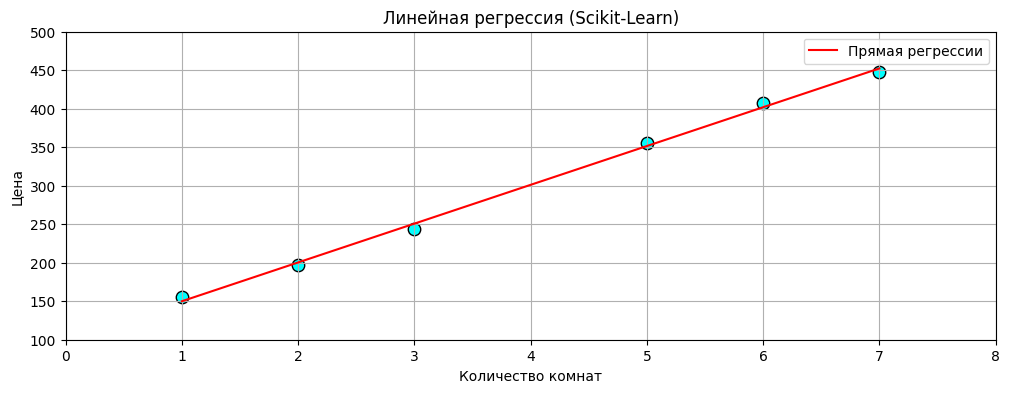

In [18]:
# –ü–æ–ª—É—á–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ –¥–ª—è –≤—Å–µ—Ö –∏—Å—Ö–æ–¥–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (features)
# –≠—Ç–æ –Ω—É–∂–Ω–æ, —á—Ç–æ–±—ã –Ω–∞—Ä–∏—Å–æ–≤–∞—Ç—å –ª–∏–Ω–∏—é —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
predicted_labels = model.predict(features_reshaped)

plt.figure(figsize=figsize)

# –°—Ç—Ä–æ–∏–º –∏—Å—Ö–æ–¥–Ω—ã–µ —Ç–æ—á–∫–∏ (–Ω–∞—Å—Ç–æ—è—â–∏–µ –¥–∞–Ω–Ω—ã–µ)
plot_points(features, labels, markers='o', xlim=xlim, ylim=ylim)

# –°—Ç—Ä–æ–∏–º —Å–∞–º—É –ø—Ä—è–º—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –ø–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏—è–º
plt.plot(features, predicted_labels, color='red', label='–ü—Ä—è–º–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏')

# –î–æ–±–∞–≤–ª—è–µ–º –ø–æ–¥–ø–∏—Å–∏ –æ—Å–µ–π –∏ –∑–∞–≥–æ–ª–æ–≤–æ–∫
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–æ–º–Ω–∞—Ç')
plt.ylabel('–¶–µ–Ω–∞')
plt.title('–õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è (Scikit-Learn)')

# –î–æ–±–∞–≤–ª—è–µ–º –ª–µ–≥–µ–Ω–¥—É, —á—Ç–æ–±—ã –æ—Ç–ª–∏—á–∞—Ç—å —Ç–æ—á–∫–∏ –æ—Ç –ª–∏–Ω–∏–∏
plt.legend()

# –í–∫–ª—é—á–∞–µ–º —Å–µ—Ç–∫—É –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ
plt.grid(True)

# –ü–æ–∫–∞–∑—ã–≤–∞–µ–º —Ñ–∏–Ω–∞–ª—å–Ω—ã–π –≥—Ä–∞—Ñ–∏–∫
plt.show()

# –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ —Ü–µ–Ω –Ω–∞ –∂–∏–ª—å–µ –≤ –ò–Ω–¥–∏–∏ —Å –ø–æ–º–æ—â—å—é –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏

In [19]:
# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
data = pd.read_csv('data/Hyderabad.csv')  # –ó–∞–≥—Ä—É–∂–∞–µ–º –¥–∞–Ω–Ω—ã–µ –∏–∑ CSV-—Ñ–∞–π–ª–∞
data.head()  # –ü–æ–∫–∞–∑—ã–≤–∞–µ–º –ø–µ—Ä–≤—ã–µ 5 —Å—Ç—Ä–æ–∫ –¥–∞–Ω–Ω—ã—Ö

Price  Area     Location  No. of Bedrooms  Resale  MaintenanceStaff  \
0   6968000  1340     Nizampet                2       0                 0   
1  29000000  3498  Hitech City                4       0                 0   
2   6590000  1318    Manikonda                2       0                 0   
3   5739000  1295        Alwal                3       1                 0   
4   5679000  1145   Kukatpally                2       0                 0   

   Gymnasium  SwimmingPool  LandscapedGardens  JoggingTrack  ...  \
0          1             1                  1             1  ...   
1          1             1                  1             1  ...   
2          1             0                  0             0  ...   
3          0             0                  0             0  ...   
4          0             0                  1             0  ...   

   LiftAvailable  BED  VaastuCompliant  Microwave  GolfCourse  TV  \
0              1    0                1          0           0   0   
1              1    0                1          0           0   0   
2              0    0                0          0           0   0   
3              1    0                0          0           0   0   
4              1    0                0          0           0   0   

   DiningTable  Sofa  Wardrobe  Refrigerator  
0            0     0         0             0  
1            0     0         0             0  
2            0     0         0             0  
3            0     0         0             0  
4            0     0         0             0  

[5 rows x 40 columns]

In [20]:
# –í—ã–≤–æ–¥–∏–º —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –¥–∞–Ω–Ω—ã—Ö
num_rows, num_cols = data.shape
print("–î–∞—Ç–∞—Å–µ—Ç —Å–æ–¥–µ—Ä–∂–∏—Ç", num_rows, "—Å—Ç—Ä–æ–∫ –∏", num_cols, "—Å—Ç–æ–ª–±—Ü–æ–≤")

–î–∞—Ç–∞—Å–µ—Ç —Å–æ–¥–µ—Ä–∂–∏—Ç 2518 —Å—Ç—Ä–æ–∫ –∏ 40 —Å—Ç–æ–ª–±—Ü–æ–≤


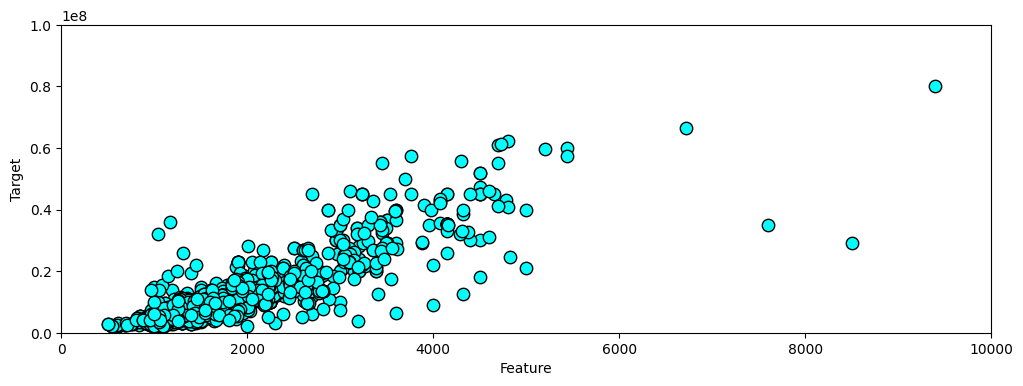

In [21]:
# –ò—Å—Å–ª–µ–¥—É–µ–º –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ü–µ–Ω—ã –æ—Ç –ø–ª–æ—â–∞–¥–∏
xlim=(0, 10**4)
ylim=(0, 10**8)

plt.figure(figsize=figsize)
plot_points(data['Area'], data['Price'], markers='o', xlim=xlim, ylim=ylim)  # –°—Ç—Ä–æ–∏–º —Ç–æ—á–µ—á–Ω—ã–π –≥—Ä–∞—Ñ–∏–∫
plt.show()

In [22]:
# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –ø—Ä–æ—Å—Ç–æ–π –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ (–ø–ª–æ—â–∞–¥—å -> —Ü–µ–Ω–∞)
X = data[['Area']]  # –ü—Ä–∏–∑–Ω–∞–∫: –ø–ª–æ—â–∞–¥—å (–ø–ª–æ—â–∞–¥—å –≤ –∫–≤–∞–¥—Ä–∞—Ç–Ω—ã—Ö —Ñ—É—Ç–∞—Ö)
y = data['Price']  # –¶–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è: —Ü–µ–Ω–∞ (–≤ –∏–Ω–¥–∏–π—Å–∫–∏—Ö —Ä—É–ø–∏—è—Ö)

In [23]:
# –°–æ–∑–¥–∞–µ–º –∏ –æ–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
simple_model = LinearRegression()  # –°–æ–∑–¥–∞–µ–º –º–æ–¥–µ–ª—å
simple_model.fit(X, y)  # –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å –Ω–∞ –¥–∞–Ω–Ω—ã—Ö

LinearRegression()

In [24]:
# –í—ã–≤–æ–¥–∏–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏
print(f"–°–≤–æ–±–æ–¥–Ω—ã–π —á–ª–µ–Ω (intercept): {simple_model.intercept_}")  # –¢–æ—á–∫–∞ –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏—è —Å –æ—Å—å—é Y
print(f"–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –Ω–∞–∫–ª–æ–Ω–∞ (–¥–ª—è –ø–ª–æ—â–∞–¥–∏): {simple_model.coef_[0]}")  # –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –ø—Ä–∏ –ø–ª–æ—â–∞–¥–∏

–°–≤–æ–±–æ–¥–Ω—ã–π —á–ª–µ–Ω (intercept): -6222669.083283702
–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –Ω–∞–∫–ª–æ–Ω–∞ (–¥–ª—è –ø–ª–æ—â–∞–¥–∏): 9753.94060818404


In [25]:
# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω–æ–π –ª–∏–Ω–∏–∏
area_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # –°–æ–∑–¥–∞–µ–º –¥–∏–∞–ø–∞–∑–æ–Ω –∑–Ω–∞—á–µ–Ω–∏–π –ø–ª–æ—â–∞–¥–∏
predicted_prices = simple_model.predict(area_range)  # –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä—É–µ–º —Ü–µ–Ω—ã –¥–ª—è —ç—Ç–æ–≥–æ –¥–∏–∞–ø–∞–∑–æ–Ω–∞

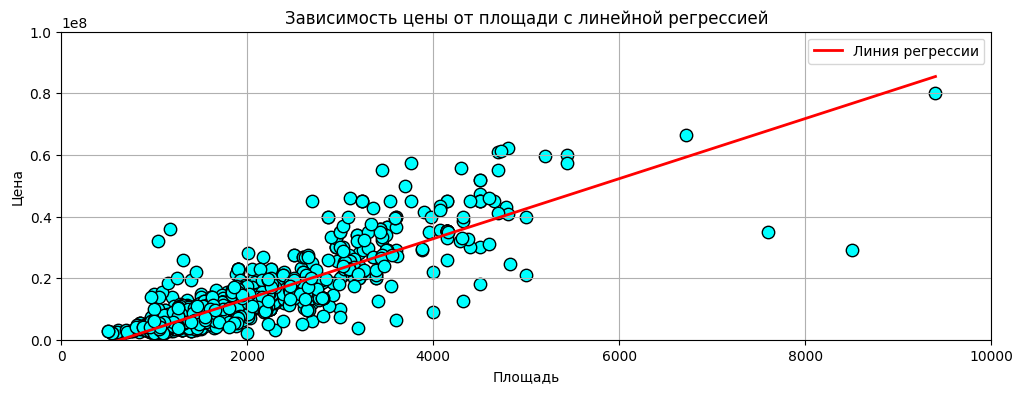

In [26]:
plt.figure(figsize=figsize)

plot_points(X, y, markers='o', xlim=xlim, ylim=ylim)  # –ò—Å—Ö–æ–¥–Ω—ã–µ —Ç–æ—á–∫–∏ –¥–∞–Ω–Ω—ã—Ö

plt.plot(area_range, predicted_prices, color='red', linewidth=2, label='–õ–∏–Ω–∏—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏')  # –õ–∏–Ω–∏—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
plt.xlabel('–ü–ª–æ—â–∞–¥—å')  # –ü–æ–¥–ø–∏—Å—å –æ—Å–∏ X
plt.ylabel('–¶–µ–Ω–∞')  # –ü–æ–¥–ø–∏—Å—å –æ—Å–∏ Y
plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ü–µ–Ω—ã –æ—Ç –ø–ª–æ—â–∞–¥–∏ —Å –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–µ–π')  # –ó–∞–≥–æ–ª–æ–≤–æ–∫
plt.legend()  # –õ–µ–≥–µ–Ω–¥–∞
plt.grid(True)  # –°–µ—Ç–∫–∞
plt.show()  # –ü–æ–∫–∞–∑–∞—Ç—å –≥—Ä–∞—Ñ–∏–∫

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ —Å–æ –≤—Å–µ–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏

In [27]:
data

Price  Area     Location  No. of Bedrooms  Resale  MaintenanceStaff  \
0      6968000  1340     Nizampet                2       0                 0   
1     29000000  3498  Hitech City                4       0                 0   
2      6590000  1318    Manikonda                2       0                 0   
3      5739000  1295        Alwal                3       1                 0   
4      5679000  1145   Kukatpally                2       0                 0   
...        ...   ...          ...              ...     ...               ...   
2513  11000000  1460     Nacharam                2       1                 9   
2514  26000000  1314    Manikonda                2       1                 9   
2515  13300000  2625     Madhapur                3       1                 9   
2516  10800000  2050  Hitech City                3       0                 9   
2517  10400000  1805     Narsingi                3       0                 9   

      Gymnasium  SwimmingPool  LandscapedGardens  JoggingTrack  ...  \
0             1             1                  1             1  ...   
1             1             1                  1             1  ...   
2             1             0                  0             0  ...   
3             0             0                  0             0  ...   
4             0             0                  1             0  ...   
...         ...           ...                ...           ...  ...   
2513          9             9                  9             9  ...   
2514          9             9                  9             9  ...   
2515          9             9                  9             9  ...   
2516          9             9                  9             9  ...   
2517          9             9                  9             9  ...   

      LiftAvailable  BED  VaastuCompliant  Microwave  GolfCourse  TV  \
0                 1    0                1          0           0   0   
1                 1    0                1          0           0   0   
2                 0    0                0          0           0   0   
3                 1    0                0          0           0   0   
4                 1    0                0          0           0   0   
...             ...  ...              ...        ...         ...  ..   
2513              9    9                9          9           9   9   
2514              9    9                9          9           9   9   
2515              9    9                9          9           9   9   
2516              9    9                9          9           9   9   
2517              9    9                9          9           9   9   

      DiningTable  Sofa  Wardrobe  Refrigerator  
0               0     0         0             0  
1               0     0         0             0  
2               0     0         0             0  
3               0     0         0             0  
4               0     0         0             0  
...           ...   ...       ...           ...  
2513            9     9         9             9  
2514            9     9         9             9  
2515            9     9         9             9  
2516            9     9         9             9  
2517            9     9         9             9  

[2518 rows x 40 columns]

In [28]:
# –ü—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–∞—è –æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö:
# 1. –£–¥–∞–ª–µ–Ω–∏–µ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π (–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –∫–∞–∫ '9')
data_truncated = data[:2434]  # –£–¥–∞–ª—è–µ–º –ø–æ—Å–ª–µ–¥–Ω–∏–µ —Å—Ç—Ä–æ–∫–∏ —Å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏

In [29]:
# –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
data_scaled = data_truncated.copy()

# –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ –ø–ª–æ—â–∞–¥–∏ (—Ü–µ–Ω—Ç—Ä–∏—Ä–æ–≤–∞–Ω–∏–µ –∏ –Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ)
area_mean = data_scaled['Area'].mean()  # –°—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–ª–æ—â–∞–¥–∏
area_std = data_scaled['Area'].std()  # –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –ø–ª–æ—â–∞–¥–∏
data_scaled['Area'] = (data_scaled['Area'] - area_mean) / area_std  # –°—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏—è

# –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Å–ø–∞–ª–µ–Ω
bedrooms_mean = data_scaled['No. of Bedrooms'].mean()
bedrooms_std = data_scaled['No. of Bedrooms'].std()
data_scaled['No. of Bedrooms'] = (data_scaled['No. of Bedrooms'] - bedrooms_mean) / bedrooms_std

data_scaled.head()

Price      Area     Location  No. of Bedrooms  Resale  MaintenanceStaff  \
0   6968000 -0.406547     Nizampet        -0.913997       0                 0   
1  29000000  2.477960  Hitech City         2.005515       0                 0   
2   6590000 -0.435953    Manikonda        -0.913997       0                 0   
3   5739000 -0.466696        Alwal         0.545759       1                 0   
4   5679000 -0.667195   Kukatpally        -0.913997       0                 0   

   Gymnasium  SwimmingPool  LandscapedGardens  JoggingTrack  ...  \
0          1             1                  1             1  ...   
1          1             1                  1             1  ...   
2          1             0                  0             0  ...   
3          0             0                  0             0  ...   
4          0             0                  1             0  ...   

   LiftAvailable  BED  VaastuCompliant  Microwave  GolfCourse  TV  \
0              1    0                1          0           0   0   
1              1    0                1          0           0   0   
2              0    0                0          0           0   0   
3              1    0                0          0           0   0   
4              1    0                0          0           0   0   

   DiningTable  Sofa  Wardrobe  Refrigerator  
0            0     0         0             0  
1            0     0         0             0  
2            0     0         0             0  
3            0     0         0             0  
4            0     0         0             0  

[5 rows x 40 columns]

In [30]:
# One-hot –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ "–ú–µ—Å—Ç–æ–ø–æ–ª–æ–∂–µ–Ω–∏–µ"
data_scaled_encoded = pd.get_dummies(data_scaled, columns=['Location'], prefix='Location', dtype=int)

In [31]:
# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é
X_full = data_scaled_encoded.drop('Price', axis=1)  # –í—Å–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∫—Ä–æ–º–µ —Ü–µ–Ω—ã
y_full = data_scaled_encoded['Price']  # –¶–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è (—Ü–µ–Ω–∞)

In [32]:
# –°–æ–∑–¥–∞–Ω–∏–µ –∏ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
model_predict_all = LinearRegression()  # –°–æ–∑–¥–∞–µ–º –º–æ–¥–µ–ª—å
model_predict_all.fit(X_full, y_full)  # –û–±—É—á–∞–µ–º –Ω–∞ –≤—Å–µ—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö

LinearRegression()

In [33]:
# –í—ã–≤–æ–¥ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ –º–æ–¥–µ–ª–∏
print("\n–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ (–ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ —Ü–µ–Ω—ã –ø–æ –≤—Å–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∞–º):")
print(f"{'–ü–∞—Ä–∞–º–µ—Ç—Ä':<30} {'–ó–Ω–∞—á–µ–Ω–∏–µ':>15}")
print("-" * 50)
print(f"{'–°–≤–æ–±–æ–¥–Ω—ã–π —á–ª–µ–Ω (intercept)':<30} {model_predict_all.intercept_:>15.2f}")

print("\n\n–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:")
print(f"{'‚Ññ':<5} {'–ü—Ä–∏–∑–Ω–∞–∫':<45} {'–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç':>15}")
print("-" * 70)


dot_count = 0
for i, (feature, coef) in enumerate(zip(X_full.columns, model_predict_all.coef_), 1):
    if (i < 6) or (i > 272):
        print(f"{i:<5} {feature:<45} {coef:>15.2f}")
        
    elif (dot_count == 0):
        dot_count += 1
        print('...')


–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ (–ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ —Ü–µ–Ω—ã –ø–æ –≤—Å–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∞–º):
–ü–∞—Ä–∞–º–µ—Ç—Ä                              –ó–Ω–∞—á–µ–Ω–∏–µ
--------------------------------------------------
–°–≤–æ–±–æ–¥–Ω—ã–π —á–ª–µ–Ω (intercept)          8947283.55


–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:
‚Ññ     –ü—Ä–∏–∑–Ω–∞–∫                                           –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç
----------------------------------------------------------------------
1     Area                                               7023504.92
2     No. of Bedrooms                                    -946893.40
3     Resale                                             1243472.50
4     MaintenanceStaff                                  -1009480.51
5     Gymnasium                                          -566573.47
...
273   Location_muthangi                                 -2266006.55
274   Location_new nallakunta                            1355643.48
27

In [34]:
# –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏
y_pred = model_predict_all.predict(X_full)  # –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä—É–µ–º —Ü–µ–Ω—ã
print(f"RMSE –º–æ–¥–µ–ª–∏: {np.sqrt(mean_squared_error(y_full, y_pred)):,.2f}")  # –í—ã–≤–æ–¥–∏–º –∫–æ—Ä–µ–Ω—å –∏–∑ —Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–æ–π –æ—à–∏–±–∫–∏ –º–æ–¥–µ–ª–∏

RMSE –º–æ–¥–µ–ª–∏: 3,981,396.29


In [35]:
# –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ —Ü–µ–Ω—ã –¥–ª—è –Ω–æ–≤–æ–≥–æ –¥–æ–º–∞ (–ø–ª–æ—â–∞–¥—å 1000, 3 —Å–ø–∞–ª—å–Ω–∏)
new_house_data = pd.DataFrame({'Area': [1000], 'No. of Bedrooms': [3]})

# –ü—Ä–∏–º–µ–Ω—è–µ–º —Ç–æ –∂–µ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ, —á—Ç–æ –∏ –¥–ª—è –æ–±—É—á–∞—é—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö
new_house_data['Area'] = (new_house_data['Area'] - area_mean) / area_std
new_house_data['No. of Bedrooms'] = (new_house_data['No. of Bedrooms'] - bedrooms_mean) / bedrooms_std

# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ one-hot –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è –¥–ª—è –º–µ—Å—Ç–æ–ø–æ–ª–æ–∂–µ–Ω–∏—è
location_cols = [col for col in X_full.columns if col.startswith('Location_')]
new_house_location_dummies = pd.DataFrame(0, index=new_house_data.index, columns=location_cols)


# –ü—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ–º, —á—Ç–æ –¥–æ–º –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –≤ 'Gachibowli' (–µ—Å–ª–∏ —Ç–∞–∫–æ–π —Ä–∞–π–æ–Ω –±—ã–ª –≤ –æ–±—É—á–∞—é—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö)
if 'Location_Gachibowli' in location_cols:
    new_house_location_dummies['Location_Gachibowli'] = 1
else:
    print("–ü—Ä–µ–¥—É–ø—Ä–µ–∂–¥–µ–Ω–∏–µ: —Ä–∞–π–æ–Ω 'Gachibowli' –Ω–µ –Ω–∞–π–¥–µ–Ω –≤ –æ–±—É—á–∞—é—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö")


# –û–±—ä–µ–¥–∏–Ω—è–µ–º –≤—Å–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
new_house_processed = pd.concat([new_house_data, new_house_location_dummies], axis=1)

# –î–æ–±–∞–≤–ª—è–µ–º –Ω–µ–¥–æ—Å—Ç–∞—é—â–∏–µ –∫–æ–ª–æ–Ω–∫–∏ (–∑–∞–ø–æ–ª–Ω—è–µ–º –Ω—É–ª—è–º–∏)
for col in X_full.columns:
    if col not in new_house_processed.columns:
        new_house_processed[col] = 0

# –£–ø–æ—Ä—è–¥–æ—á–∏–≤–∞–µ–º –∫–æ–ª–æ–Ω–∫–∏ –∫–∞–∫ –≤ –æ–±—É—á–∞—é—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö
new_house_processed = new_house_processed[X_full.columns]


# –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä—É–µ–º —Ü–µ–Ω—É
predicted_price = model_predict_all.predict(new_house_processed)
print(f"–ü—Ä–æ–≥–Ω–æ–∑–∏—Ä—É–µ–º–∞—è —Ü–µ–Ω–∞ –¥–ª—è –¥–æ–º–∞ –ø–ª–æ—â–∞–¥—å—é 1000 –∫–≤.—Ñ—É—Ç–æ–≤ –∏ 3 —Å–ø–∞–ª—å–Ω—è–º–∏: {predicted_price[0]:,.2f} —Ä—É–ø–∏–π")

–ü—Ä–æ–≥–Ω–æ–∑–∏—Ä—É–µ–º–∞—è —Ü–µ–Ω–∞ –¥–ª—è –¥–æ–º–∞ –ø–ª–æ—â–∞–¥—å—é 1000 –∫–≤.—Ñ—É—Ç–æ–≤ –∏ 3 —Å–ø–∞–ª—å–Ω—è–º–∏: 6,004,735.31 —Ä—É–ø–∏–π


# –ü–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è

–ï—Å–ª–∏ –¥–∞–Ω–Ω—ã–µ –Ω–µ —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω—ã –Ω–∞ –ø—Ä—è–º–æ–π - –∏—Å–ø–æ–ª—å–∑—É–µ–º –ø–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é.  
–ù–µ–±–æ–ª—å—à–æ–µ —É—Å–ª–æ–≤–∏–µ –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏ –º–æ–¥–µ–ª–∏ –ø–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –∑–∞–∫–ª—é—á–∞–µ—Ç—Å—è –≤ —Ç–æ–º, —á—Ç–æ –º—ã –¥–æ–ª–∂–Ω—ã –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å —Å—Ç–µ–ø–µ–Ω—å –º–Ω–æ–≥–æ—á–ª–µ–Ω–∞ **–ø–µ—Ä–µ–¥ –Ω–∞—á–∞–ª–æ–º –æ–±—É—á–µ–Ω–∏—è**.

In [36]:
# —Å–ø–∏—Å–æ–∫ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤
experiments = [
    {
        "features": np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]),
        "labels": lambda x: 3 * x + 4,
        "degree": 1,
        "lr": 0.01,
        "epochs": 150
    },
    {
        "features": np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]),
        "labels": lambda x: x**2 - 2 * x - 3,
        "degree": 2,
        "lr": 0.001,
        "epochs": 1000
    },
    {
        "features": np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]),
        "labels": lambda x: x**3 + 2 * x**2 - 4 * x - 1,
        "degree": 3,
        "lr": 0.0001,
        "epochs": 5000
    },
]

xlim=(-6, 6)
ylim=(-60, 160)

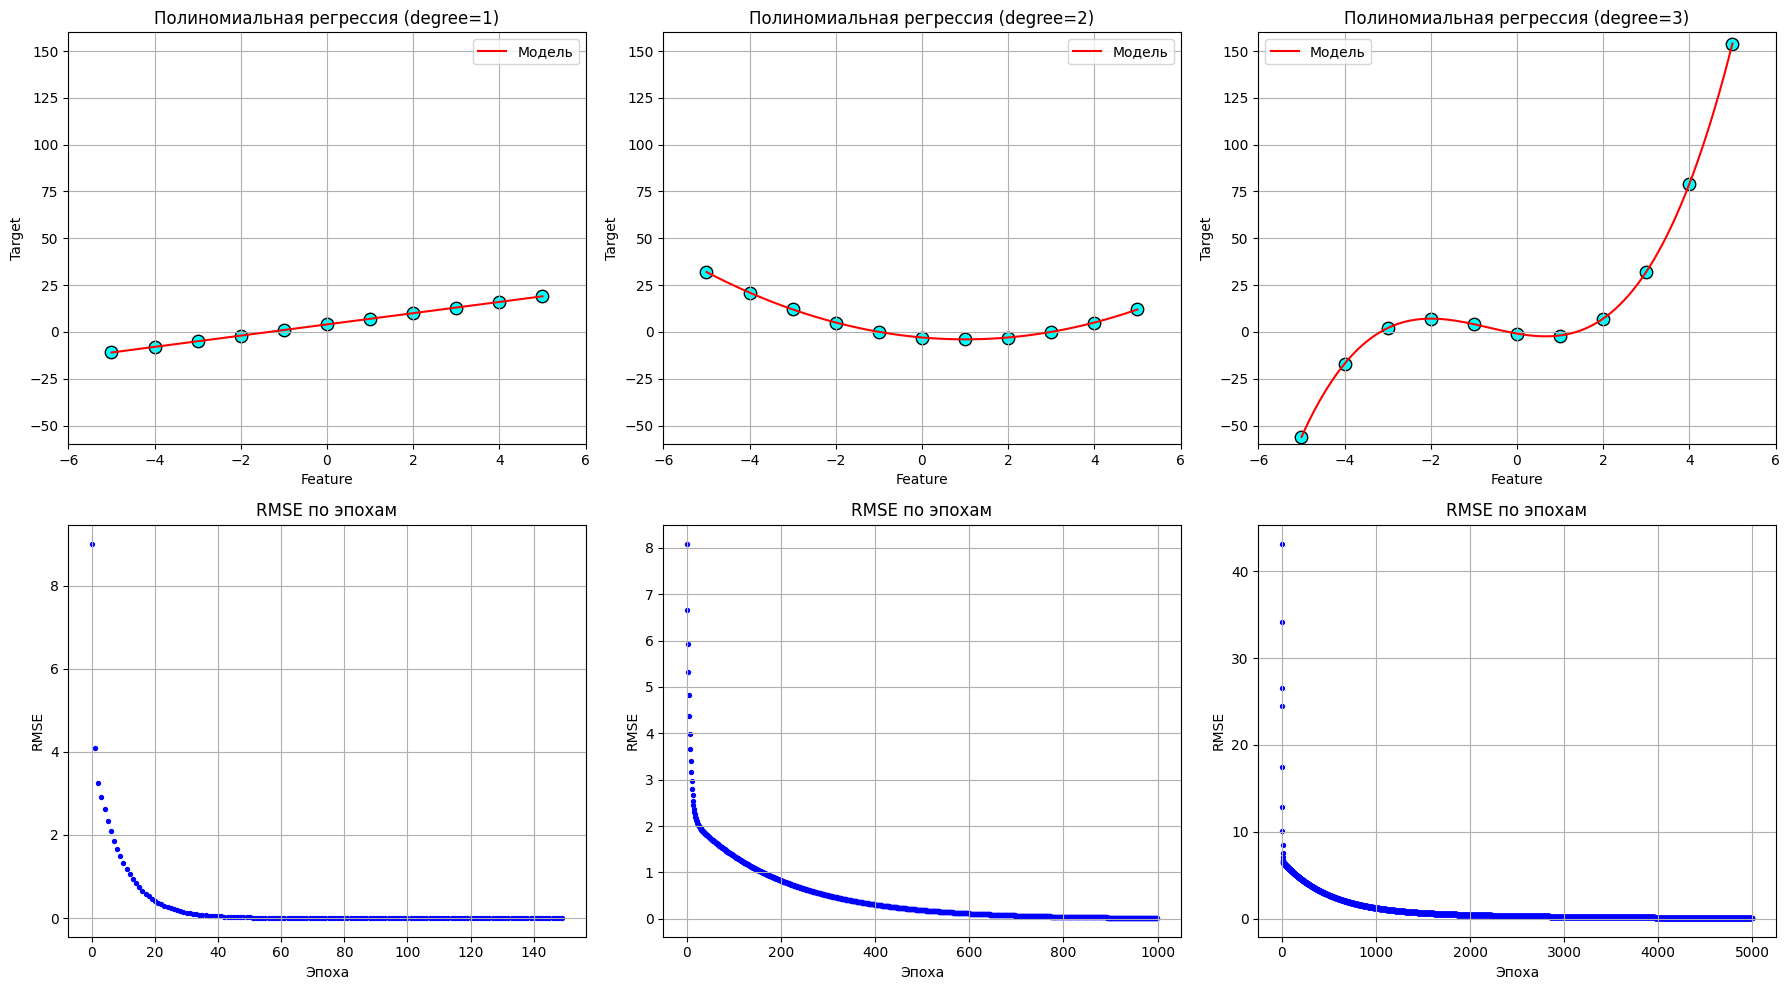

In [37]:
# –æ–±—â–∞—è —Ñ–∏–≥—É—Ä–∞ 2x3
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, exp in enumerate(experiments):
    features = exp["features"]
    labels = exp["labels"](features)

    weights, errors_list = polynomial_regression(
        features, labels,
        degree=exp["degree"],
        learning_rate=exp["lr"],
        epochs=exp["epochs"],
        error='rmse',
        mode='batch'
    )

    # –≤–µ—Ä—Ö–Ω—è—è —Å—Ç—Ä–æ–∫–∞ ‚Üí –º–æ–¥–µ–ª—å
    ax_model = axes[0, i]
    plot_model_poly(weights, exp["degree"], features, labels, ax=ax_model)
    plot_points(features, labels, markers='o', xlim=xlim, ylim=ylim, ax=ax_model)

    # –Ω–∏–∂–Ω—è—è —Å—Ç—Ä–æ–∫–∞ ‚Üí –æ—à–∏–±–∫–∏
    ax_err = axes[1, i]
    plot_errors(errors_list, "rmse", style='scatter', ax=ax_err)

plt.tight_layout()
plt.show()